In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# List all NVIDIA GPUs as avaialble in this computer (or Colab's session)
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-12f0dc75-52eb-5ef6-4847-b89b46113b12)


In [3]:
import sys
print( f"Python {sys.version}\n" )

import numpy as np
print( f"NumPy {np.__version__}\n" )

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
print( f"TensorFlow {tf.__version__}" )
print( f"tf.keras.backend.image_data_format() = {tf.keras.backend.image_data_format()}" )

# Count the number of GPUs as detected by tensorflow
gpus = tf.config.experimental.list_physical_devices('GPU')
print( f"TensorFlow detected { len(gpus) } GPU(s):" )
for i, gpu in enumerate(gpus):
    print( f".... GPU No. {i}: Name = {gpu.name} , Type = {gpu.device_type}" )

Python 3.7.12 (default, Jan 15 2022, 18:48:18) 
[GCC 7.5.0]

NumPy 1.21.5

TensorFlow 2.8.0
tf.keras.backend.image_data_format() = channels_last
TensorFlow detected 1 GPU(s):
.... GPU No. 0: Name = /physical_device:GPU:0 , Type = GPU


In [4]:
np.random.seed(1234)
tf.random.set_seed(5678)

##Filter out corrupted images

In [ ]:
import os

num_skipped = 0
for folder_name in ('Banana In Coconut Milk', 'Deep-Fried Rice Flour', 'Durian Sticky Rice', 'Pandanus Pudding in Coconut Cream', 
'Rice Balls in Sweet Coconut Milk', 'Sweet Sticky Rice with Thai Custard', 'Tapioca Balls with Pork Filling',
'Thai Crispy Pancake topped with Golden Threads', 'Thai Style Fried Savory Dumplings with Fish Filling', 'Toddy Palm Cake'):

    folder_path = os.path.join("/content/drive/MyDrive/BADS7604 Deep Learning/Assignment_3_Classification/Dataset/Train", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print("Deleted %d images" % num_skipped)

##Explore Dataset

In [ ]:
import os
import pandas as pd

train_set = {}
val_set = {}
test_set = {}

train_dir = '/content/drive/MyDrive/BADS7604 Deep Learning/Assignment_3_Classification/Dataset/Train'
val_dir = '/content/drive/MyDrive/BADS7604 Deep Learning/Assignment_3_Classification/Dataset/Validation'
test_dir = '/content/drive/MyDrive/BADS7604 Deep Learning/Assignment_3_Classification/Dataset/Test'

# train
for folder in os.listdir(train_dir):
  path = os.path.join(train_dir, folder)
  num_pic = len([name for name in os.listdir(path)])
  train_set[folder] = num_pic

# validation
for folder in os.listdir(val_dir):
  path = os.path.join(val_dir, folder)
  num_pic = len([name for name in os.listdir(path)])
  val_set[folder] = num_pic

# test
for folder in os.listdir(test_dir):
  path = os.path.join(test_dir, folder)
  num_pic = len([name for name in os.listdir(path)])
  test_set[folder] = num_pic

num_val = [v for v in val_set.values()]
num_test = [v for v in test_set.values()]

df = pd.DataFrame(train_set.items(), columns=['Class', 'TrainSet'])

df['Validation Set'] = num_val
df['Test Set'] = num_test

In [ ]:
df

,Class,TrainSet,Validation Set,Test Set
0,Banana In Coconut Milk,146,15,14
1,Thai Style Fried Savory Dumplings with Fish Fi...,129,14,18
2,Tapioca Balls with Pork Filling,151,13,18
3,Durian Sticky Rice,130,20,17
4,Pandanus Pudding in Coconut Cream,152,15,20
5,Toddy Palm Cake,125,20,20
6,Deep-Fried Rice Flour,151,15,15
7,Sweet Sticky Rice with Thai Custard,143,18,20
8,Rice Balls in Sweet Coconut Milk,120,15,18
9,Thai Crispy Pancake topped with Golden Threads,142,20,19


In [ ]:
print(df['TrainSet'].sum())
print(df['Validation Set'].sum())
print(df['Test Set'].sum())

1389
165
179


##Create a dataset

In [5]:
image_size = (224, 224)
batch_size = 32

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/BADS7604 Deep Learning/Assignment_3_Classification/Dataset/Train', 
                                                 image_size=image_size,
                                                 color_mode='rgb',
                                                 label_mode='categorical',
                                                 batch_size=batch_size,
                                                 seed=1234,
                                                 shuffle=True)

val_ds = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/BADS7604 Deep Learning/Assignment_3_Classification/Dataset/Validation', 
                                                 image_size=image_size,
                                                 color_mode='rgb',
                                                 label_mode='categorical',
                                                 batch_size=batch_size,
                                                 seed=1234,
                                                 shuffle=True)

test_ds = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/BADS7604 Deep Learning/Assignment_3_Classification/Dataset/Test', 
                                                 image_size=image_size,
                                                 color_mode='rgb',
                                                 label_mode='categorical',
                                                 batch_size=179,
                                                 seed=1234,
                                                 shuffle=True)

Found 1389 files belonging to 10 classes.
Found 165 files belonging to 10 classes.
Found 179 files belonging to 10 classes.


In [7]:
class_names = train_ds.class_names
print(class_names)

['Banana In Coconut Milk', 'Deep-Fried Rice Flour', 'Durian Sticky Rice', 'Pandanus Pudding in Coconut Cream', 'Rice Balls in Sweet Coconut Milk', 'Sweet Sticky Rice with Thai Custard', 'Tapioca Balls with Pork Filling', 'Thai Crispy Pancake topped with Golden Threads', 'Thai Style Fried Savory Dumplings with Fish Filling', 'Toddy Palm Cake']


##Visualize the data

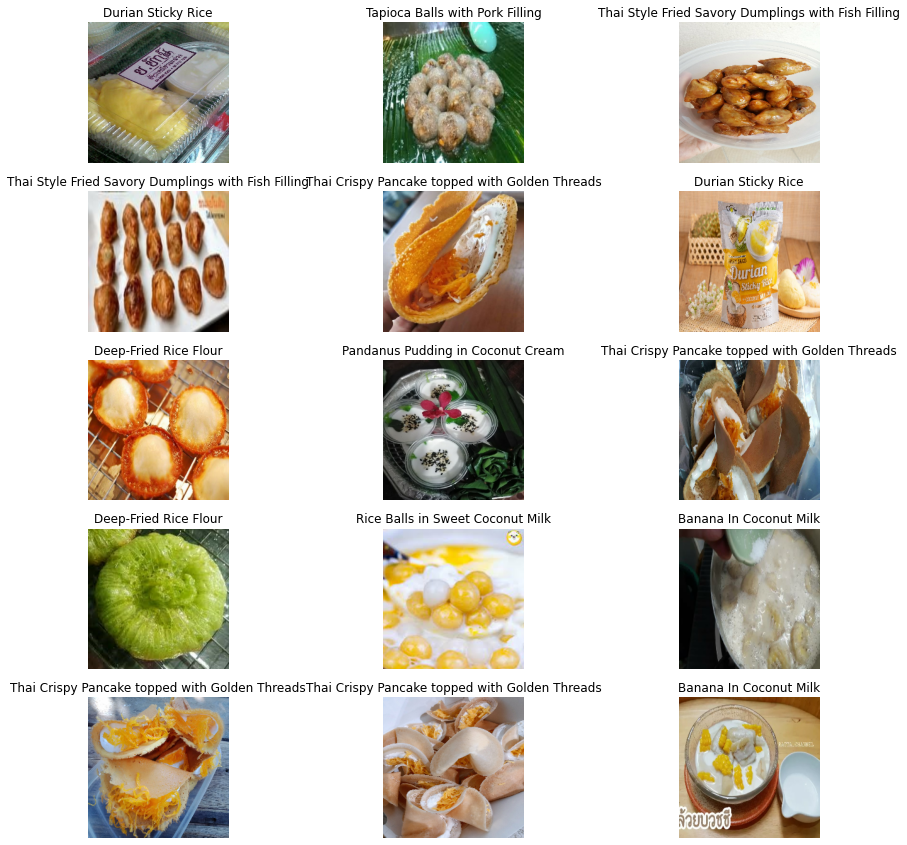

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
for images, labels in train_ds.take(1):
  for i in range(15):
    ax = plt.subplot(5, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32, 10)


##Data augmentation

In [9]:
data_augmentation = tf.keras.Sequential([tf.keras.layers.RandomFlip(mode="horizontal_and_vertical", seed=1234),
                                         tf.keras.layers.RandomRotation(0.3),
                                         ])

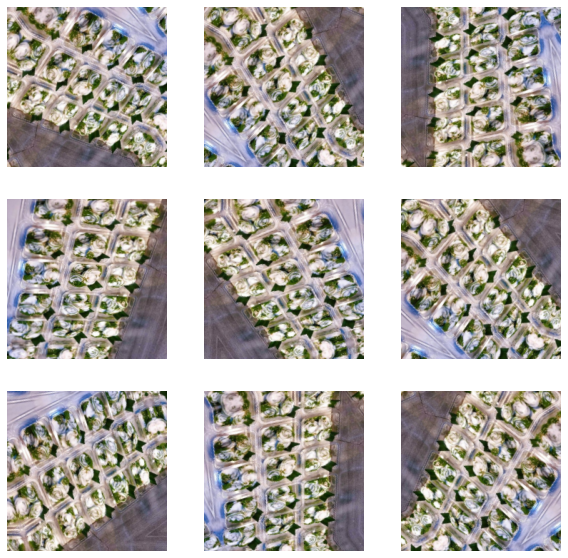

In [10]:
for image, _ in train_ds.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

##Rescale pixel values

In [11]:
preprocess_input = tf.keras.applications.densenet.preprocess_input

##Create the base model from the pre-trained convnets

In [15]:
# Load the ImageNet EfficientNetB0 model
base_model = tf.keras.applications.densenet.DenseNet121(input_shape=(224,224,3),
                                                  include_top=False,
                                                  weights='imagenet')

image_batch, label_batch = next(iter(train_ds))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 7, 7, 1024)


In [16]:
# freeze the layers
base_model.trainable = False

In [17]:
# Let's take a look at the base model architecture
base_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_4 (ZeroPadding2  (None, 230, 230, 3)  0          ['input_3[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d_4[0][0]']       
                                )                                                       

In [18]:
len(base_model.layers)

427

##Add a classification head

In [19]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1024)


In [20]:
num_classes = len(class_names)

prediction_layer = tf.keras.layers.Dense(num_classes, activation='softmax')
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 10)


In [21]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)

x = base_model(x, training=False)


x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)

outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [22]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 224, 224, 3)      0         
                                                                 
 tf.math.truediv_1 (TFOpLamb  (None, 224, 224, 3)      0         
 da)                                                             
                                                                 
 densenet121 (Functional)    (None, 7, 7, 1024)        703750

##Compile and Train the model

In [23]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss='CategoricalCrossentropy',
              metrics=['accuracy'])

In [24]:
%cd '/content/drive/MyDrive/BADS7604 Deep Learning/Assignment_3_Classification/dn_model'

/content/drive/MyDrive/BADS7604 Deep Learning/Assignment_3_Classification/dn_model


In [25]:
checkpoint_filepath = "bestmodel_epoch.hdf5"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                               save_weights_only=False,
                                                               monitor='val_accuracy',
                                                               mode='max',
                                                               save_best_only=True,
                                                               )

csv_logger = tf.keras.callbacks.CSVLogger('training.log')

In [26]:
epochs=100

history = model.fit(train_ds,
                    epochs=epochs,
                    validation_data=val_ds,
                    callbacks=[model_checkpoint_callback, csv_logger],
                    )

Epoch 1/100
44/44 [==============================] - 300s 7s/step - loss: 2.9192 - accuracy: 0.0950 - val_loss: 2.4767 - val_accuracy: 0.1030
Epoch 2/100
44/44 [==============================] - 16s 318ms/step - loss: 2.5681 - accuracy: 0.1289 - val_loss: 2.3064 - val_accuracy: 0.1394
Epoch 3/100
44/44 [==============================] - 16s 319ms/step - loss: 2.3898 - accuracy: 0.1620 - val_loss: 2.1618 - val_accuracy: 0.1818
Epoch 4/100
44/44 [==============================] - 16s 322ms/step - loss: 2.2622 - accuracy: 0.2153 - val_loss: 2.0251 - val_accuracy: 0.2485
Epoch 5/100
44/44 [==============================] - 16s 323ms/step - loss: 2.1669 - accuracy: 0.2354 - val_loss: 1.9003 - val_accuracy: 0.3091
Epoch 6/100
44/44 [==============================] - 16s 315ms/step - loss: 1.9915 - accuracy: 0.3024 - val_loss: 1.7842 - val_accuracy: 0.3879
Epoch 7/100
44/44 [==============================] - 16s 317ms/step - loss: 1.8591 - accuracy: 0.3643 - val_loss: 1.6864 - val_accuracy: 0

In [27]:
import os
bestmodel_path = max([f for f in os.listdir('/content/drive/MyDrive/BADS7604 Deep Learning/Assignment_3_Classification/dn_model') \
                      if f.startswith('bestmodel_') and f.endswith('.hdf5')])

print(bestmodel_path)

dn_best = tf.keras.models.load_model(bestmodel_path, compile=True)

bestmodel_epoch.hdf5


In [28]:
loss0, accuracy0 = dn_best.evaluate(val_ds)

print("initial loss: {:.4f}".format(loss0))
print("initial accuracy: {:.4f}".format(accuracy0))

6/6 [==============================] - 4s 90ms/step - loss: 0.4669 - accuracy: 0.9152
initial loss: 0.4669
initial accuracy: 0.9152


##Visualize training results

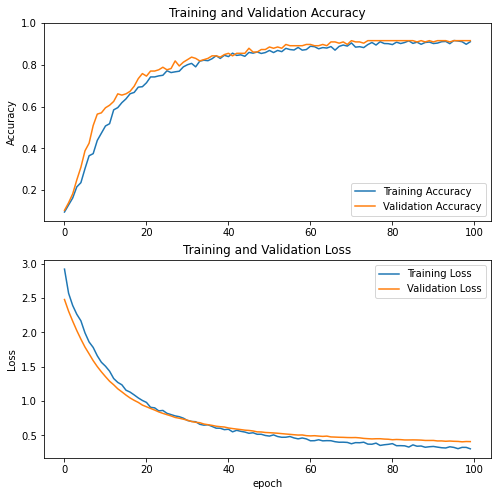

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
# plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

##Evaluation and prediction

In [30]:
loss1, accuracy1 = dn_best.evaluate(test_ds)

print("initial loss: {:.4f}".format(loss1))
print("initial accuracy: {:.4f}".format(accuracy1))

1/1 [==============================] - 50s 50s/step - loss: 0.4360 - accuracy: 0.8436
initial loss: 0.4360
initial accuracy: 0.8436


In [31]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_ds.as_numpy_iterator().next()
predictions = dn_best.predict_on_batch(image_batch)


predictions = [np.argmax(i) for i in predictions]
labels = [np.argmax(i) for i in label_batch]

print('Predictions:\n', predictions)
print('Labels:\n', labels)

plt.figure(figsize=(15, 60))
for i in range(30):
  ax = plt.subplot(15, 2, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(f"Prediction: {class_names[predictions[i]]} \n Actual: {class_names[labels[i]]}")
  plt.axis("off")

Output hidden; open in https://colab.research.google.com to view.

In [32]:
from sklearn.metrics import classification_report

print(classification_report(labels, predictions, target_names=class_names, digits=4))

                                                     precision    recall  f1-score   support

                             Banana In Coconut Milk     0.6522    0.8333    0.7317        18
                              Deep-Fried Rice Flour     0.9333    0.7778    0.8485        18
                                 Durian Sticky Rice     0.7857    0.7857    0.7857        14
                  Pandanus Pudding in Coconut Cream     0.8571    0.6000    0.7059        20
                   Rice Balls in Sweet Coconut Milk     0.8824    0.8824    0.8824        17
                Sweet Sticky Rice with Thai Custard     0.8000    1.0000    0.8889        20
                    Tapioca Balls with Pork Filling     0.8571    0.8000    0.8276        15
     Thai Crispy Pancake topped with Golden Threads     1.0000    1.0000    1.0000        20
Thai Style Fried Savory Dumplings with Fish Filling     0.8500    0.9444    0.8947        18
                                    Toddy Palm Cake     0.8824    0.7

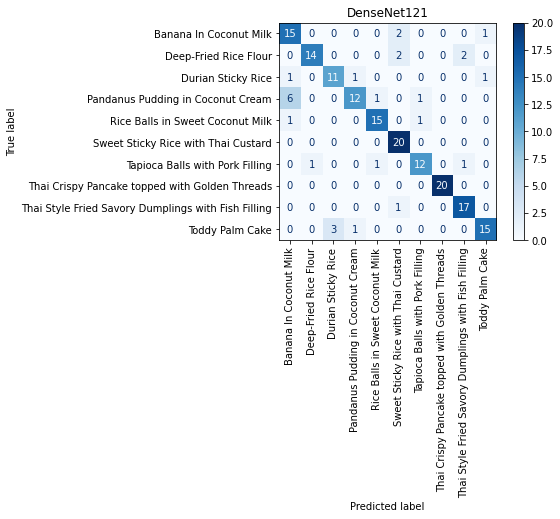

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm  = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

disp.plot(cmap=plt.cm.Blues)
# plt.savefig('confusion_matrix.png')
plt.title('DenseNet121')
plt.xticks(rotation=90)
plt.show()